# Text Data Explanation Benchmarking: Machine Translation

This notebook demonstrates how to use the benchmark utility to benchmark the performance of  an explainer for text data. In this demo, we showcase explanation performance for partition explainer on a Machine Translation model. The metrics used to evaluate are "keep positive" and "keep negative". The masker used is Text Masker. 

The new benchmark utility uses the new API with MaskedModel as wrapper around user-imported model and evaluates masked values of inputs. 

In [1]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import nlp 
import shap
import shap.benchmark as benchmark
import torch

### Load Data and Model

In [2]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-es")

In [3]:
dataset = nlp.load_dataset('xsum',split='train')

Using custom data configuration default


In [4]:
s = [dataset['summary'][i] for i in range(10)]

### Create Explainer Object

In [5]:
explainer = shap.Explainer(model,tokenizer)

### Run SHAP Explanation

In [6]:
shap_values = explainer(s)

  0%|          | 0/48 [00:00<?, ?it/s]
50it [00:02, 24.63it/s]               
60it [00:04,  9.34it/s]
  0%|          | 0/48 [00:00<?, ?it/s]
50it [00:01, 26.63it/s]               
60it [00:03, 13.09it/s]
  0%|          | 0/48 [00:00<?, ?it/s]
50it [00:01, 29.01it/s]               
60it [00:03, 13.12it/s]
  0%|          | 0/48 [00:00<?, ?it/s]
56it [00:01, 34.66it/s]               
66it [00:03, 14.23it/s]
  0%|          | 0/48 [00:00<?, ?it/s]
60it [00:01, 38.32it/s]               
  0%|          | 0/48 [00:00<?, ?it/s]
56it [00:01, 35.86it/s]               
66it [00:03, 15.55it/s]
  0%|          | 0/48 [00:00<?, ?it/s]
60it [00:01, 37.54it/s]               
  0%|          | 0/48 [00:00<?, ?it/s]
56it [00:01, 37.65it/s]               
66it [00:02, 16.01it/s]
Partition explainer: 11it [01:43,  9.43s/it]


### Define Metrics (Sort Order & Perturbation Method)

In [7]:
sort_order = 'positive'
perturbation = 'keep'

### Benchmark Explainer

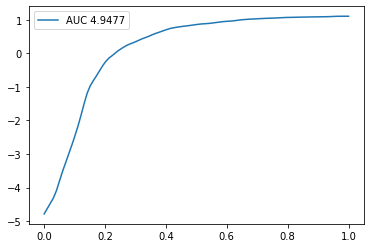

In [8]:
sp = benchmark.perturbation.SequentialPerturbation(explainer.model, explainer.masker, sort_order, perturbation)
xs, ys, auc = sp.model_score(shap_values, s)
sp.plot(xs, ys, auc)

In [9]:
sort_order = 'negative'
perturbation = 'keep'

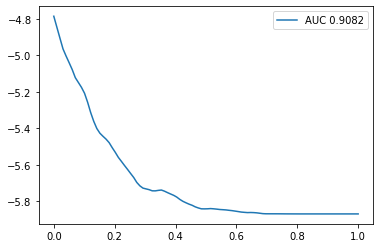

In [10]:
sp = benchmark.perturbation.SequentialPerturbation(explainer.model, explainer.masker, sort_order, perturbation)
xs, ys, auc = sp.model_score(shap_values, s)
sp.plot(xs, ys, auc)